y (98, 3)
y (33, 3)
LSQ Cost
0.54619783
training accuracy
0.78571427
test accuracy
0.5151515
Correlation coefficient [[1.         0.30358174]
 [0.30358174 1.        ]]


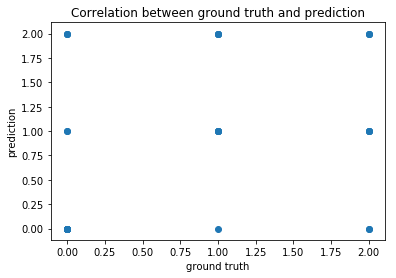

9 16 3 5
Sensitivity w.r.t class 0 0.6428571428571429
Specificity w.r.t class 0 0.8421052631578947
5 17 6 5
Sensitivity w.r.t class 1 0.5
Specificity w.r.t class 1 0.7391304347826086
3 17 6 6
Sensitivity w.r.t class 1 0.3333333333333333
Specificity w.r.t class 1 0.7391304347826086


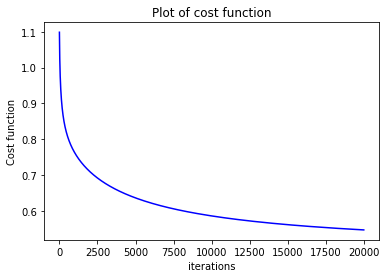

In [ ]:
#Multiclass Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from __future__ import division
import tensorflow as tf
def sigmoid(x):
    return expit(x)
def log_reg_model(X_train, Y_train,X_test,Y_test):
    
    N=X_train.shape[0]#No.of inputs
    M=X_train.shape[1]#No. of features
    learning_rate = 0.3
    epochs =20000
    
       
    J_values=np.zeros(epochs)#
    
    
    #set placeholders
    X = tf.placeholder(tf.float32,[None, M])
    Y = tf.placeholder(tf.float32,[None,3])
    
    #initialize weights
    weights = tf.Variable(tf.zeros([M,3]))
   
    
    # predict y
    y_pred = tf.matmul(X,weights)
    
    #compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=y_pred))
    
    #Optimize using gradient sedcent
    train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    #Predict    
    predicted = tf.nn.softmax(y_pred)
    
    #predicted classes
    pred_labels=tf.argmax(predicted,1)
    true_labels=tf.argmax(Y,1)
    #Compute accuracy
    accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_labels,true_labels),dtype=tf.float32))
        
    
    #TensorFlow session
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
                          
  
    #Train
    for i in range(epochs):
        res=sess.run([train_op,cost], feed_dict={X:X_train, Y:Y_train})
        J_values[i]=res[1]
    print("LSQ Cost")
    print(res[1])
    
    print("training accuracy")
    a=sess.run(accuracy,feed_dict={X:X_train, Y:Y_train})
    print(a)
    
    
    print("test accuracy")
    p, a = sess.run([predicted,accuracy], feed_dict={X: X_test, Y: Y_test})
    
    print(a)
    
    
    #Compute sensitivity, specificity using one vs all
    #Class 0
    Y_pred,Y_true=sess.run([pred_labels,true_labels],feed_dict={X: X_test, Y: Y_test})
    
    #find the correlation coefficient between prediction and ground truth
    corr_coef=np.corrcoef(Y_pred.flatten(), Y_true.flatten())
    print("Correlation coefficient", corr_coef)
    plt.scatter(Y_true,Y_pred)
    plt.xlabel("ground truth")
    plt.ylabel("prediction")
    plt.title("Correlation between ground truth and prediction")
    plt.show()
    
    TP = np.sum(np.logical_and(Y_pred == 0, Y_true == 0))
    TN = np.sum(np.logical_and(np.logical_or(Y_pred ==1 , Y_pred ==2), np.logical_or(Y_true ==1 , Y_true==2)))
    FP = np.sum(np.logical_and(Y_pred == 0, np.logical_or(Y_true ==1 , Y_true==2)))
    FN = np.sum(np.logical_and(np.logical_or(Y_pred ==1 , Y_pred ==2), Y_true == 0))
    print(TP,TN,FP,FN)
    print("Sensitivity w.r.t class 0",TP/(TP+FN))
    print("Specificity w.r.t class 0",TN/(TN+FP))
    
    #class 1
    TP = np.sum(np.logical_and(Y_pred == 1, Y_true == 1))
    TN = np.sum(np.logical_and(np.logical_or(Y_pred ==0 , Y_pred ==2), np.logical_or(Y_true ==0 , Y_true==2)))
    FP = np.sum(np.logical_and(Y_pred == 1, np.logical_or(Y_true ==0 , Y_true==2)))
    FN = np.sum(np.logical_and(np.logical_or(Y_pred ==0, Y_pred ==2), Y_true == 1))
    print(TP,TN,FP,FN)
    print("Sensitivity w.r.t class 1",TP/(TP+FN))
    print("Specificity w.r.t class 1",TN/(TN+FP))
    
    
    #class 2
    TP = np.sum(np.logical_and(Y_pred == 2, Y_true == 2))
    TN = np.sum(np.logical_and(np.logical_or(Y_pred ==0 , Y_pred ==1), np.logical_or(Y_true ==1 , Y_true==0)))
    FP = np.sum(np.logical_and(Y_pred == 2, np.logical_or(Y_true ==0 , Y_true==2)))
    FN = np.sum(np.logical_and(np.logical_or(Y_pred ==1 , Y_pred ==0), Y_true == 2))
    print(TP,TN,FP,FN)
    print("Sensitivity w.r.t class 1",TP/(TP+FN))
    print("Specificity w.r.t class 1",TN/(TN+FP))
    
    #plot of cost function
    fig1= plt.figure()
    plt.plot(np.arange(epochs),J_values,'b')
    plt.xlabel("iterations")
    plt.ylabel("Cost function")
    plt.title("Plot of cost function")
    plt.show()
    
    
    
    
    
def get_dataset(data):
    dfo=pd.read_csv(data).astype('float32')
    df = (dfo - dfo.mean()) / (dfo.max() - dfo.min())
    #print(df.shape)
    X=df[df.columns[0:30]]
    
    df['y']=np.where(dfo['OS']<300, '0', np.where(dfo['OS']<450,'1', '2'))
    Y=pd.DataFrame(df['y'])
    Y_one_hot= pd.get_dummies(Y,prefix=['y'])
    #A=df[df['y']==0]
    
    #B=df[df['y']==1]
    #print(df.corr())
    print("y",Y_one_hot.shape)

    return X,Y_one_hot
        
X_train, Y_train =get_dataset("30_train_features.csv")
#print(X_train.shape,Y_train.shape)
X_test, Y_test=get_dataset("30_test_features.csv")
#print(Y_test)
#print(X_test.shape,Y_test.shape)
log_reg_model(X_train, Y_train,X_test,Y_test)

 